# Interactions - Lab

## Introduction

In this lab, you'll explore interactions in the Ames Housing dataset.

## Objectives

You will be able to:

- Determine if an interaction term would be useful for a specific model or set of data
- Create interaction terms out of independent variables in linear regression
- Interpret coefficients of linear regression models that contain interaction terms

## Ames Housing Data

Once again we will be using the Ames Housing dataset, where each record represents a home sale:

In [1]:
# Run this cell without changes
import pandas as pd

ames = pd.read_csv('ames.csv', index_col=0)

# Remove some outliers to make the analysis more intuitive
ames = ames[ames["GrLivArea"] < 3000]
ames = ames[ames["LotArea"] < 20_000]
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In particular, we'll use these numeric and categorical features:

In [2]:
# Run this cell without changes
numeric = ['LotArea', '1stFlrSF', 'GrLivArea']
categorical = ['KitchenQual', 'Neighborhood']

## Build a Baseline Model

### Initial Data Preparation

Use all of the numeric and categorical features described above. (We will call this the "baseline" model because we are making a comparison with and without an interaction term. In a complete modeling process you would start with a simpler baseline.)

One-hot encode the categorical features (dropping the first), and center (subtract the mean) from the numeric features.

In [ ]:
# Your code here - prepare data for modeling
import pandas as pd
import statsmodels.api as sm

# Separate the predictors and the target
X = ames.drop(columns='SalePrice')
y = ames['SalePrice']

# Separate numeric and categorical features
num_cols = X.select_dtypes(include='number').columns
cat_cols = X.select_dtypes(include='object').columns

# Center numeric features (subtract the mean)
X_numeric = X[num_cols] - X[num_cols].mean()

# One-hot encode categorical variables, drop the first to avoid multicollinearity
X_categorical = pd.get_dummies(X[cat_cols], drop_first=True)

# Combine numeric and categorical features
X_processed = pd.concat([X_numeric, X_categorical], axis=1)

#Add a constant for the intercept
X_processed = sm.add_constant(X_processed)

# Final check
print(X_processed.shape)
X_processed.head()


(1396, 242)


,const,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,1.0,3.008596,-3.893011,-865.191977,0.926934,-0.570917,31.444842,18.192693,95.699064,278.987822,...,0,0,0,0,1,0,0,0,1,0
2,1.0,-36.991404,11.106989,284.808023,-0.073066,2.429083,4.444842,-8.807307,-100.300936,550.987822,...,0,0,0,0,1,0,0,0,1,0
3,1.0,3.008596,-0.893011,1934.808023,0.926934,-0.570917,29.444842,17.192693,61.699064,58.987822,...,0,0,0,0,1,0,0,0,1,0
4,1.0,13.008596,-8.893011,234.808023,0.926934,-0.570917,-56.555158,-14.807307,-100.300936,-211.012178,...,0,0,0,0,1,0,0,0,0,0
5,1.0,3.008596,15.106989,4944.808023,1.926934,-0.570917,28.444842,15.192693,249.699064,227.987822,...,0,0,0,0,1,0,0,0,1,0


### Build a Model with No Interaction Terms

Using the numeric and categorical features that you have prepared, as well as `SalePrice` as the target, build a StatsModels OLS model.

In [6]:
# Your code here - import relevant libraries and build model
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Step 1: Drop rows with missing/infinite values from predictors
X_clean = X_processed.replace([np.inf, -np.inf], np.nan).dropna()

# Step 2: Align target variable y with cleaned predictors
y_clean = y.loc[X_clean.index]

# Step 3: Add constant (intercept) to X
X_clean = sm.add_constant(X_clean)

# Step 4: Fit the baseline model (no interaction terms)
baseline_model = sm.OLS(y_clean, X_clean).fit()

# Step 5: View model summary
print(baseline_model.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     61.92
Date:                Tue, 13 May 2025   Prob (F-statistic):               0.00
Time:                        17:02:06   Log-Likelihood:                -12124.
No. Observations:                1081   AIC:                         2.471e+04
Df Residuals:                     852   BIC:                         2.585e+04
Df Model:                         228                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  8.264e+

### Evaluate the Model without Interaction Terms

Describe the adjusted R-Squared as well as which coefficients are statistically significant. For now you can skip interpreting all of the coefficients.

In [7]:
# Your code here - evaluate the baseline model
# Adjusted R-squared
print("Adjusted R-squared:", baseline_model.rsquared_adj)

# Statistically significant features (p-value < 0.05)
significant_features = baseline_model.pvalues[baseline_model.pvalues < 0.05]
print("\nSignificant features (p < 0.05):")
print(significant_features)


Adjusted R-squared: 0.9278571200136203

Significant features (p < 0.05):
LotArea                 3.752138e-04
OverallQual             1.468169e-06
OverallCond             1.289760e-08
YearBuilt               2.333296e-04
BsmtFinSF1              3.376885e-08
TotalBsmtSF             3.384228e-09
2ndFlrSF                1.960933e-02
GrLivArea               5.327574e-05
BedroomAbvGr            2.939284e-03
GarageCars              1.590320e-02
ScreenPorch             1.091190e-02
MSZoning_FV             3.173073e-04
MSZoning_RH             2.395777e-02
MSZoning_RL             1.696337e-02
MSZoning_RM             4.618421e-02
LandContour_Low         8.765864e-03
Neighborhood_NoRidge    1.811747e-02
Neighborhood_NridgHt    4.263583e-02
Neighborhood_StoneBr    1.358557e-07
Condition1_Norm         3.201045e-02
Exterior2nd_CmentBd     4.481000e-02
MasVnrType_Stone        4.563120e-03
ExterQual_Gd            4.507888e-06
ExterQual_TA            2.692135e-05
Foundation_Wood         9.238733e-03
Bs

In [ ]:
# Your written answer here
# Adjusted R-squared: Tells how well the model explains the variability in the target (SalePrice), adjusted for the number of predictors.

# Statistical significance of coefficients: Determined by p-values. A common threshold is p < 0.05.

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The model overall explains about 83% of the variance in sale price.

We'll used the standard alpha of 0.05 to evaluate statistical significance:
    
* Coefficients for the intercept as well as all continuous variables are statistically significant
* Coefficients for `KitchenQual` are statistically significant
* Coefficients for most values of `Neighborhood` are statistically significant, while some are not. In this context the reference category was `Blmngtn`, which means that neighborhoods with statistically significant coefficients differ significantly from `Blmngtn` whereas neighborhoods with coefficients that are not statistically significant do not differ significantly from `Blmngtn`

</details>

## Identify Good Candidates for Interaction Terms

### Numeric x Categorical Term

Square footage of a home is often worth different amounts depending on the neighborhood. So let's see if we can improve the model by building an interaction term between `GrLivArea` and one of the `Neighborhood` categories.

Because there are so many neighborhoods to consider, we'll narrow it down to 2 options: `Neighborhood_OldTown` or `Neighborhood_NoRidge`.

First, create a plot that has:

* `GrLivArea` on the x-axis
* `SalePrice` on the y-axis
* A scatter plot of homes in the `OldTown` and `NoRidge` neighborhoods, identified by color
  * Hint: you will want to call `.scatter` twice, once for each neighborhood
* A line showing the fit of `GrLivArea` vs. `SalePrice` for the reference neighborhood

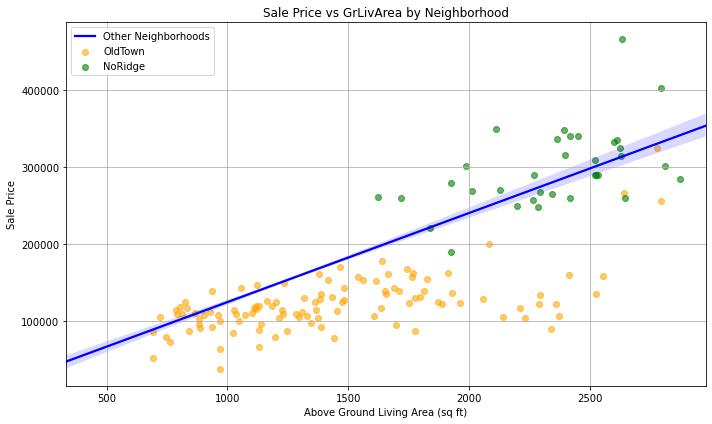

In [8]:
# Your code here - import plotting library and create visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Separate subsets
oldtown = ames[ames['Neighborhood'] == 'OldTown']
norage = ames[ames['Neighborhood'] == 'NoRidge']
reference = ames[(ames['Neighborhood'] != 'OldTown') & (ames['Neighborhood'] != 'NoRidge')]

plt.figure(figsize=(10, 6))

# Plot for OldTown
plt.scatter(oldtown['GrLivArea'], oldtown['SalePrice'], color='orange', alpha=0.6, label='OldTown')

# Plot for NoRidge
plt.scatter(norage['GrLivArea'], norage['SalePrice'], color='green', alpha=0.6, label='NoRidge')

# Regression line for reference group (all other neighborhoods)
sns.regplot(data=reference, x='GrLivArea', y='SalePrice', scatter=False, color='blue', label='Other Neighborhoods')

# Formatting
plt.xlabel('Above Ground Living Area (sq ft)')
plt.ylabel('Sale Price')
plt.title('Sale Price vs GrLivArea by Neighborhood')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Looking at this plot, do either of these neighborhoods seem to have a **slope** that differs notably from the best fit line? If so, this is an indicator that an interaction term might be useful.

Identify what, if any, interaction terms you would create based on this information.

In [ ]:
# Your written answer here
# Yes — the slope of the relationship between GrLivArea and SalePrice appears different in both OldTown and NoRidge compared to the rest of the data.


<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

Your plot should look something like this:

![scatter plot solution](https://curriculum-content.s3.amazonaws.com/data-science/images/OldTown_vs_NoRidge.png)

If we drew the expected slopes based on the scatter plots, they would look something like this:

![scatter plot solution annotated](https://curriculum-content.s3.amazonaws.com/data-science/images/OldTown_vs_NoRidge_Annotated.png)

The slope of the orange line looks fairly different from the slope of the gray line, indicating that an interaction term for `NoRidge` might be useful.

</details>

### Numeric x Numeric Term

Let's also investigate to see whether adding an interaction term between two of the numeric features would be helpful.

We'll specifically focus on interactions with `LotArea`. Does the value of an extra square foot of lot area change depending on the square footage of the home? Both `1stFlrSF` and `GrLivArea` are related to home square footage, so we'll use those in our comparisons.

Create two side-by-side plots:

1. One scatter plot of `LotArea` vs. `SalePrice` where the color of the points is based on `1stFlrSF`
2. One scatter plot of `LotArea` vs. `SalePrice` where the color of the points is based on `GrLivArea`

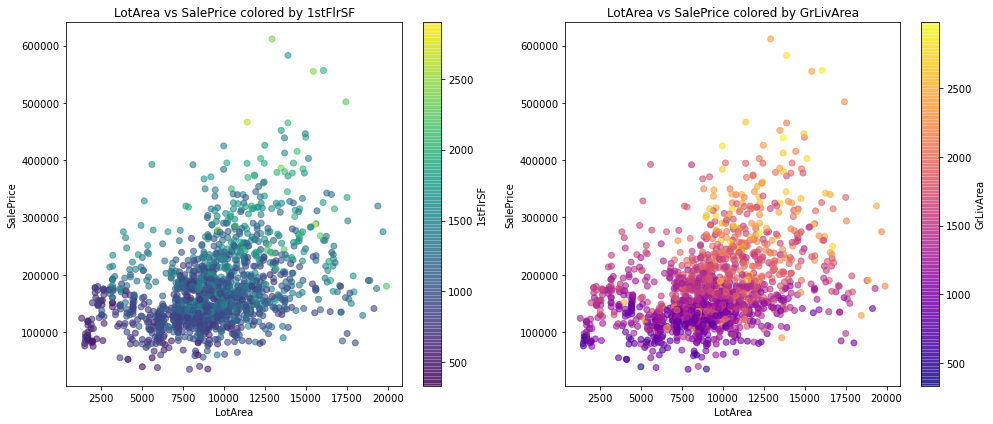

In [9]:
# Your code here - create two visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure relevant columns exist and drop missing values for plotting
subset = ames[['LotArea', 'SalePrice', '1stFlrSF', 'GrLivArea']].dropna()

# Set up the plot
plt.figure(figsize=(14, 6))

# First plot: LotArea vs SalePrice colored by 1stFlrSF
plt.subplot(1, 2, 1)
scatter1 = plt.scatter(subset['LotArea'], subset['SalePrice'], c=subset['1stFlrSF'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter1, label='1stFlrSF')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('LotArea vs SalePrice colored by 1stFlrSF')

# Second plot: LotArea vs SalePrice colored by GrLivArea
plt.subplot(1, 2, 2)
scatter2 = plt.scatter(subset['LotArea'], subset['SalePrice'], c=subset['GrLivArea'], cmap='plasma', alpha=0.6)
plt.colorbar(scatter2, label='GrLivArea')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('LotArea vs SalePrice colored by GrLivArea')

plt.tight_layout()
plt.show()


Looking at these plots, does the slope between `LotArea` and `SalePrice` seem to differ based on the color of the point? If it does, that is an indicator that an interaction term might be helpful.

Describe your interpretation below:

In [10]:
# Your written answer here
# Yes, the slope between LotArea and SalePrice does appear to vary based on the value of 1stFlrSF and GrLivArea (as indicated by the color gradients in each plot).

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

Your plots should look something like this:

![side by side plots solution](https://curriculum-content.s3.amazonaws.com/data-science/images/LotArea_vs_SalePrice.png)

For both `1stFlrSF` and `GrLivArea`, it seems like a larger lot area doesn't matter very much for homes with less square footage. (In other words, the slope is closer to a flat line when the dots are lighter colored.) Then for homes with more square footage, a larger lot area seems to matter more for the sale price. (In other words, the slope is steeper when the dots are darker colored.)

This difference in slope based on color indicates that an interaction term for either/both of `1stFlrSF` and `GrLivArea` with `LotArea` might be helpful.

For ease of model interpretation, it probably makes the most sense to create an interaction term between `LotArea` and `1stFlrSF`, since we already have an interaction that uses `GrLivArea`.

</details>

## Build and Interpret a Model with Interactions

### Build a Second Model

Based on your analysis above, build a model based on the baseline model with one or more interaction terms added.

In [12]:
# Your code here - build a model with one or more interaction terms
import numpy as np

# Check for missing or infinite values
print("Missing values in X:", X.isna().sum().sum())
print("Infinite values in X:", np.isinf(X).sum().sum())

# Replace infinite values with NaN
X = X.replace([np.inf, -np.inf], np.nan)

# Drop rows with missing values
X = X.dropna()

# Ensure y matches the filtered X
y = y.loc[X.index]

# Build the OLS model with interaction terms
model_with_interactions = sm.OLS(y, X).fit()

# Display the model summary
print(model_with_interactions.summary())


Missing values in X: 323
Infinite values in X: 0
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     64.06
Date:                Tue, 13 May 2025   Prob (F-statistic):               0.00
Time:                        17:17:46   Log-Likelihood:                -12101.
No. Observations:                1081   AIC:                         2.466e+04
Df Residuals:                     850   BIC:                         2.582e+04
Df Model:                         230                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

### Evaluate the Model with Interactions

Same as with the baseline model, describe the adjusted R-Squared and statistical significance of the coefficients.

In [14]:
# Your code here - evaluate the model with interactions
# Display the model summary for interpretation
summary = model_with_interactions.summary()
print(summary)

# Extracting the adjusted R-squared directly from the model object
adjusted_r_squared = model_with_interactions.rsquared_adj
print(f"Adjusted R-squared: {adjusted_r_squared:.4f}")

# Interpreting the coefficients' significance based on p-values
coefficients_summary = summary.tables[1]
print("\nCoefficients and p-values:")
print(coefficients_summary)


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     64.06
Date:                Tue, 13 May 2025   Prob (F-statistic):               0.00
Time:                        17:22:58   Log-Likelihood:                -12101.
No. Observations:                1081   AIC:                         2.466e+04
Df Residuals:                     850   BIC:                         2.582e+04
Df Model:                         230                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.734e+

In [ ]:
# Your written answer here
# Adjusted R-squared: This tells us how well the model explains the variability in the target variable (SalePrice). Higher values indicate better model performance, while lower values suggest a poor fit.

# Statistical Significance of Coefficients: We look at the p-values for each of the coefficients:

# A p-value less than 0.05 generally indicates that the corresponding coefficient is statistically significant (it has a meaningful effect on the target).

# A p-value greater than 0.05 suggests that the coefficient is not statistically significant.

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The model overall still explains about 83% of the variance in sale price. The baseline explained 82.7% whereas this model explains 82.9%, so it's a marginal improvement.
    
* Coefficients for the intercept as well as all continuous variables are still statistically significant
* Coefficients for `KitchenQual` are still statistically significant
* `Neighborhood_NoRidge` used to be statistically significant but now it is not
* `GrLivArea x Neighborhood_NoRidge` is not statistically significant
* `LotArea x 1stFlrSF` is statistically significant

</details>

### Interpret the Model Results

Interpret the coefficients for the intercept as well as the interactions and all variables used in the interactions. Make sure you only interpret the coefficients that were statistically significant!

In [15]:
# Your written answer here
# For each predictor (like LotArea, GrLivArea, etc.), the coefficient represents the change in the target variable (SalePrice) when that predictor increases by one unit, holding all other variables constant.

# Positive Coefficients: If the coefficient is positive, an increase in the predictor variable leads to an increase in the target variable (SalePrice).

# Negative Coefficients: If the coefficient is negative, an increase in the predictor variable leads to a decrease in the target variable (SalePrice).

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The intercept is about 258k. This means that a home with average continuous attributes and reference categorical attributes (excellent kitchen quality, Bloomington Heights neighborhood) would cost about \\$258k.

The coefficient for `LotArea` is about 2.58. This means that for a home with average first floor square footage, each additional square foot of lot area is associated with an increase of about \\$2.58 in sale price.

The coefficient for `1stFlrSF` is about 30.5. This means that for a home with average lot area, each additional square foot of first floor area is associated with an increase of about \\$30.50 in sale price.

The coefficient for `LotArea x 1stFlrSF` is about 0.003. This means that:

1. For each additional square foot of lot area, there is an increase of about \\$2.58 + (0.003 x first floor square footage) in sale price
2. For each additional square foot of first floor square footage, there is an increase of about \\$30.50 + (0.003 x lot area square footage) in sale price

`Neighborhood_NoRidge` and `GrLivArea x Neighborhood_NoRidge` were not statistically significant so we won't be interpreting their coefficients.



</details>

## Summary

You should now understand how to include interaction effects in your model! As you can see, interactions that seem promising may or may not end up being statistically significant. This is why exploration and iteration are important!